In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import metrics
from scipy import stats
from datetime import datetime
%matplotlib inline

---

## defining functions to graph metrics

In [19]:
def base_stats(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(len(y_hat)):
        if y_actual[i] == y_hat[i] == 1:
            TP += 1
        if y_hat[i] == 1 and y_actual[i] != y_hat[i]:
            FP += 1
        if y_actual[i] == y_hat[i] == 0:
            TN += 1
        if y_hat[i] == 0 and y_actual[i] != y_hat[i]:
            FN += 1
    out = [TP, TN, FP, FN]
    return out

In [20]:
def f1(stats):
    precision = stats[0] / (stats[0] + stats[2])
    recall = stats[0] / (stats[0] + stats[3])
    fscore = 2 * (precision * recall) / (precision + recall)
    return fscore

In [21]:
def graph(data, y_actual, y_hat, graph_name, th, f1scor, s):
    colorful = ["g", "b", "y", "r"]
    x_axis = ["TP", "TN", "FP", "FN"]
    scale = np.arange(0, sorted(data)[-1] + 5, 5)

    fig, (ax1, ax2) = plt.subplots(
        1, 2, figsize=(10, 5), dpi=120, gridspec_kw={"width_ratios": [1, 3]}
    )
    ax1.bar(x_axis, data, color=colorful, label="F1score:{0:.4f}".format(f1scor))
    for i, v in enumerate(data):
        ax1.text(i - 0.15, v + 0.5, data[i], fontweight="bold")
    ax1.title.set_text("Base stats w/ threshold {}".format(th))
    ax1.legend(loc="lower center")

    fpr, tpr, th = metrics.roc_curve(y_actual, y_hat)
    auc = metrics.roc_auc_score(y_actual, y_hat)
    ax2.plot(fpr, tpr, label="AUC:{0:.4f}".format(auc))
    ax2.set(xlabel="False Positive Rate", ylabel="True Positive Rate")
    ax2.title.set_text("ROC curve & AUC")
    ax2.legend()

    now = str(datetime.now())
    fig.suptitle(graph_name)
    if s == True:
        fig.savefig("/home/richardso21/images/{}{}.png".format(graph_name, now))

In [22]:
def calc(path_y_actual, path_y_hat, th, gr, graph_name, save):
    y_actual = pd.read_csv(path_y_actual).iloc[:, -1]
    y_hat = pd.read_csv(path_y_hat).iloc[:, -1]

    y_actual_th = y_actual > th
    y_hat_th = y_hat > th

    stats = base_stats(y_actual_th, y_hat_th)
    f1score = f1(stats)
    if gr == True:
        graph(stats, y_actual, y_hat, graph_name, th, f1score, save)
    print("F1score:{}".format(f1score))

In [29]:
ground_truth_path = "/home/richardso21/humanresults_groundtruth.csv"

---

# MODEL W/O PCEN

F1score:0.5925925925925926


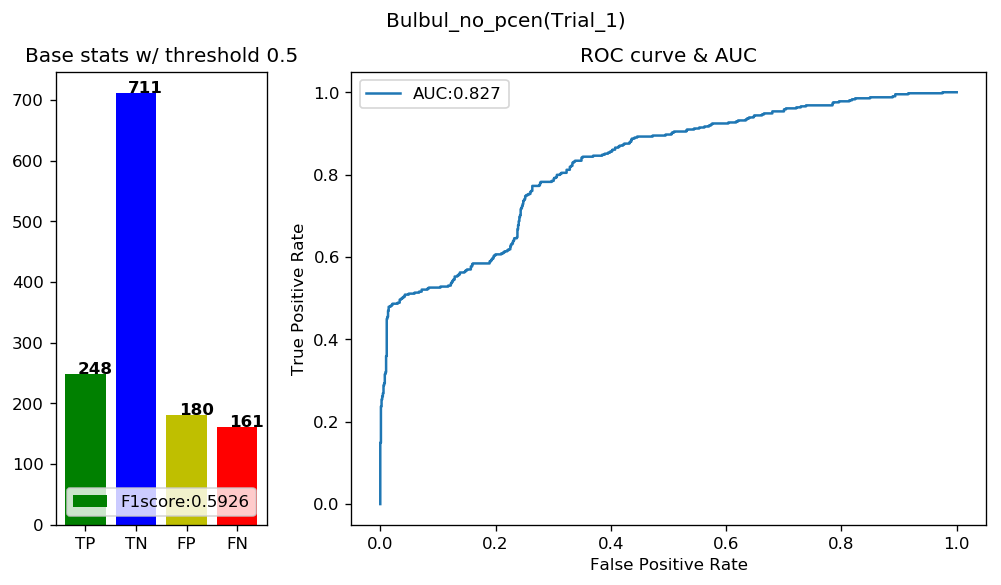

In [50]:
calc(
    ground_truth_path,
    path_y_hat="raw_preds/no_pcen/bulbul_no_pcen0.csv",
    th=0.5,
    gr=True,
    graph_name="Bulbul_no_pcen(Trial_1)",
    save=True,
)  # strange dip in performance?

F1score:0.7032640949554896


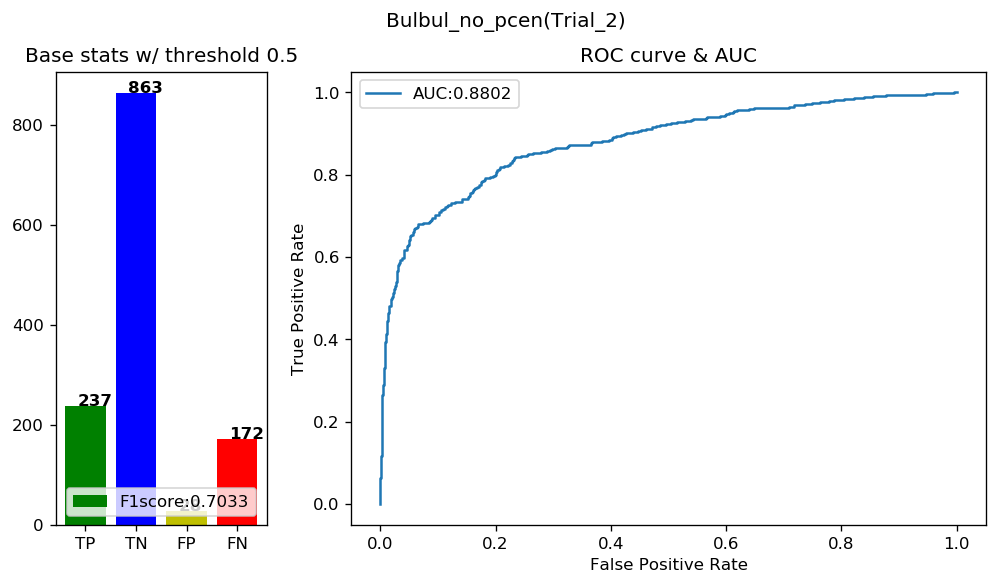

In [51]:
calc(
    ground_truth_path,
    path_y_hat="raw_preds/no_pcen/bulbul_no_pcen1.csv",
    th=0.5,
    gr=True,
    graph_name="Bulbul_no_pcen(Trial_2)",
    save=True,
)

F1score:0.6181818181818183


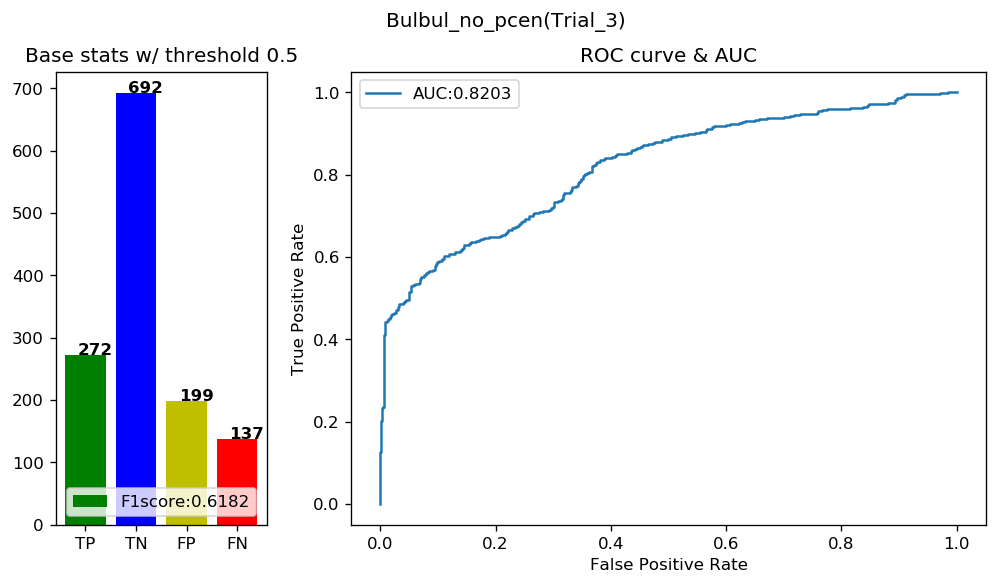

In [52]:
calc(
    ground_truth_path,
    path_y_hat="raw_preds/no_pcen/bulbul_no_pcen2.csv",
    th=0.5,
    gr=True,
    graph_name="Bulbul_no_pcen(Trial_3)",
    save=True,
)  # again?

F1score:0.6841339155749636


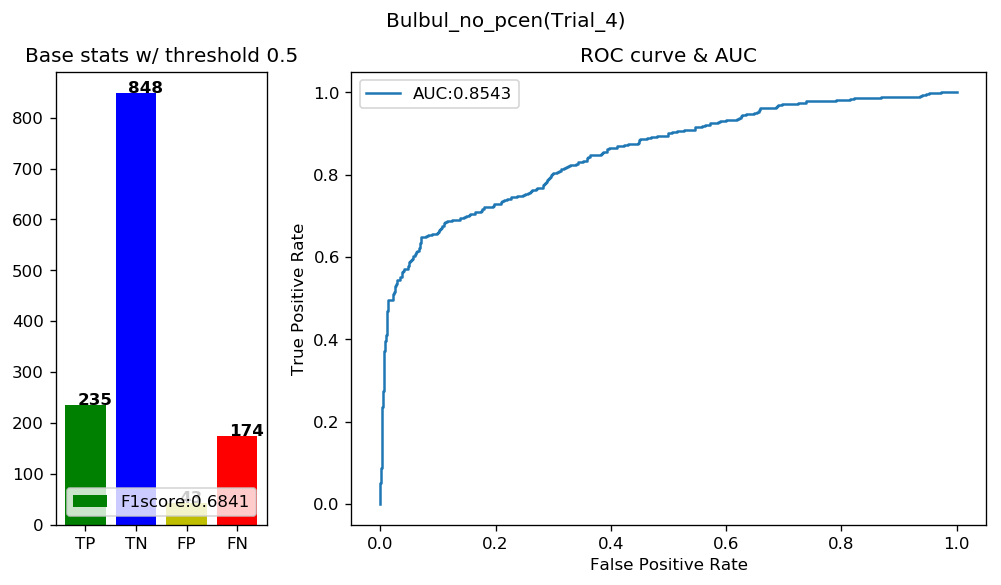

In [53]:
calc(
    ground_truth_path,
    path_y_hat="raw_preds/no_pcen/bulbul_no_pcen3.csv",
    th=0.5,
    gr=True,
    graph_name="Bulbul_no_pcen(Trial_4)",
    save=True,
)

F1score:0.7104557640750672


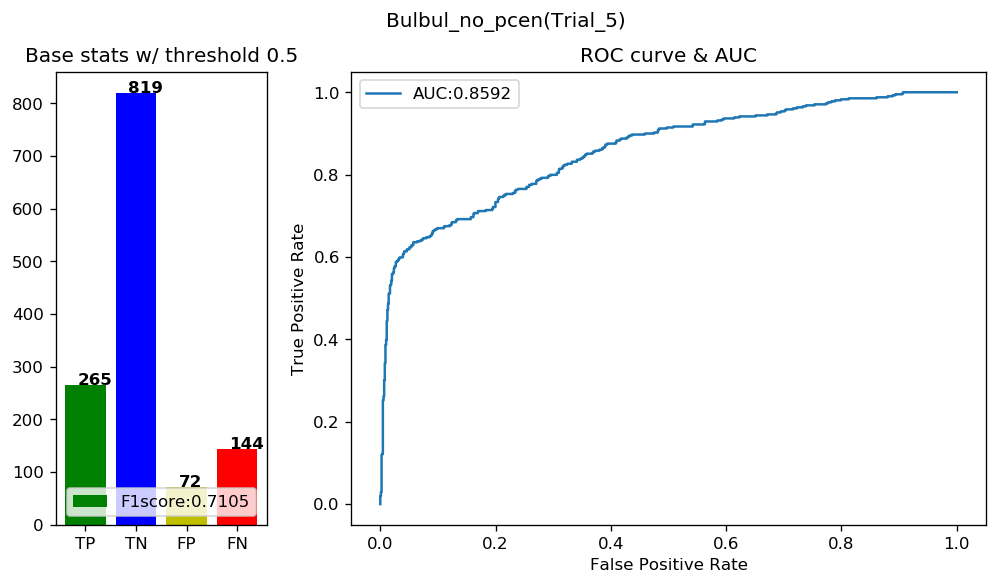

In [54]:
calc(
    ground_truth_path,
    path_y_hat="raw_preds/no_pcen/bulbul_no_pcen4.csv",
    th=0.5,
    gr=True,
    graph_name="Bulbul_no_pcen(Trial_5)",
    save=True,
)

---

# W/ PCEN

F1score:0.7574468085106383


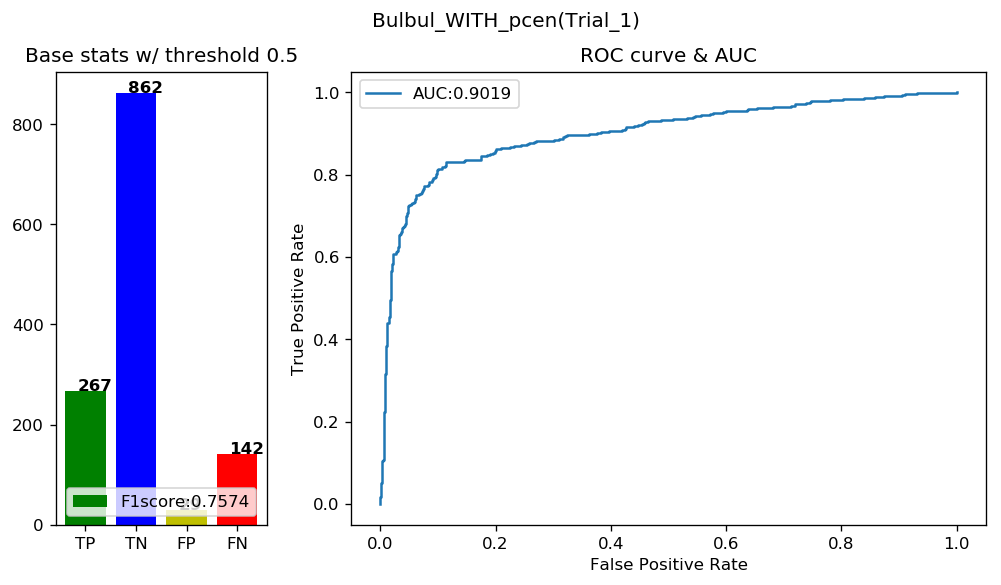

In [55]:
calc(
    ground_truth_path,
    path_y_hat="raw_preds/pcen/bulbul_pcen0.csv",
    th=0.5,
    gr=True,
    graph_name="Bulbul_WITH_pcen(Trial_1)",
    save=True,
)

F1score:0.7503566333808844


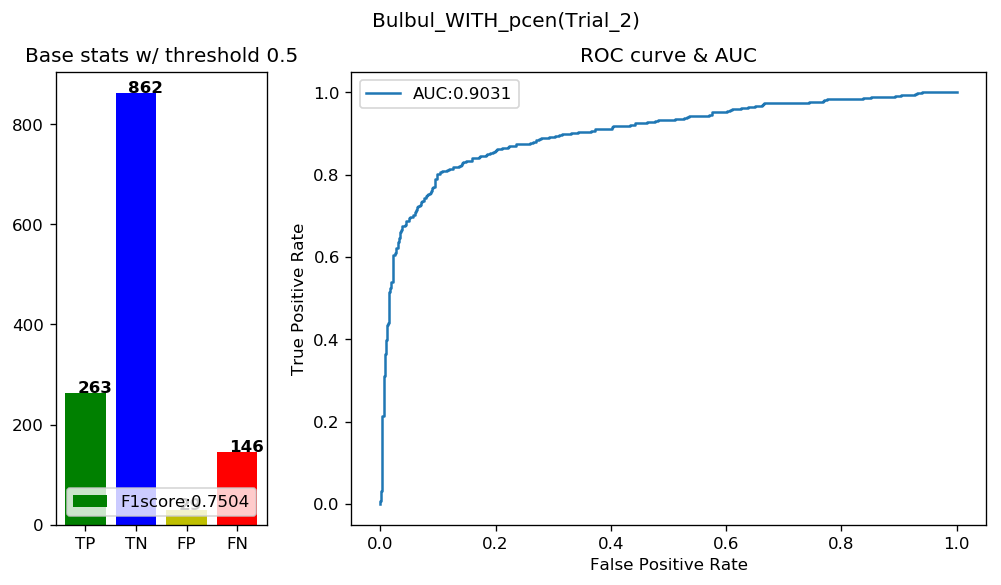

In [56]:
calc(
    ground_truth_path,
    path_y_hat="raw_preds/pcen/bulbul_pcen1.csv",
    th=0.5,
    gr=True,
    graph_name="Bulbul_WITH_pcen(Trial_2)",
    save=True,
)

F1score:0.7492957746478873


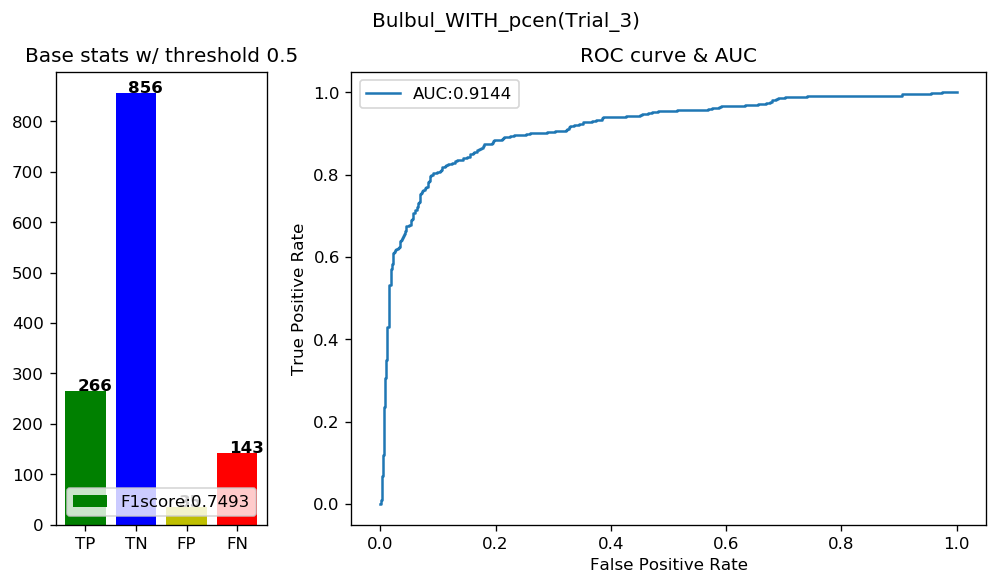

In [57]:
calc(
    ground_truth_path,
    path_y_hat="raw_preds/pcen/bulbul_pcen2.csv",
    th=0.5,
    gr=True,
    graph_name="Bulbul_WITH_pcen(Trial_3)",
    save=True,
)

F1score:0.7503566333808844


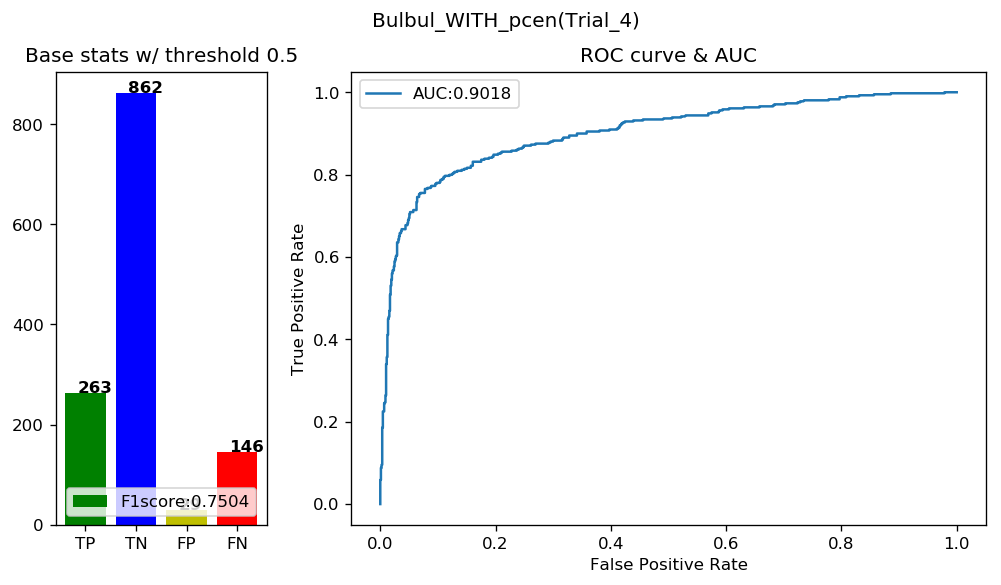

In [61]:
calc(
    ground_truth_path,
    path_y_hat="raw_preds/pcen/bulbul_pcen3.csv",
    th=0.5,
    gr=True,
    graph_name="Bulbul_WITH_pcen(Trial_4)",
    save=True,
)

F1score:0.7581329561527581


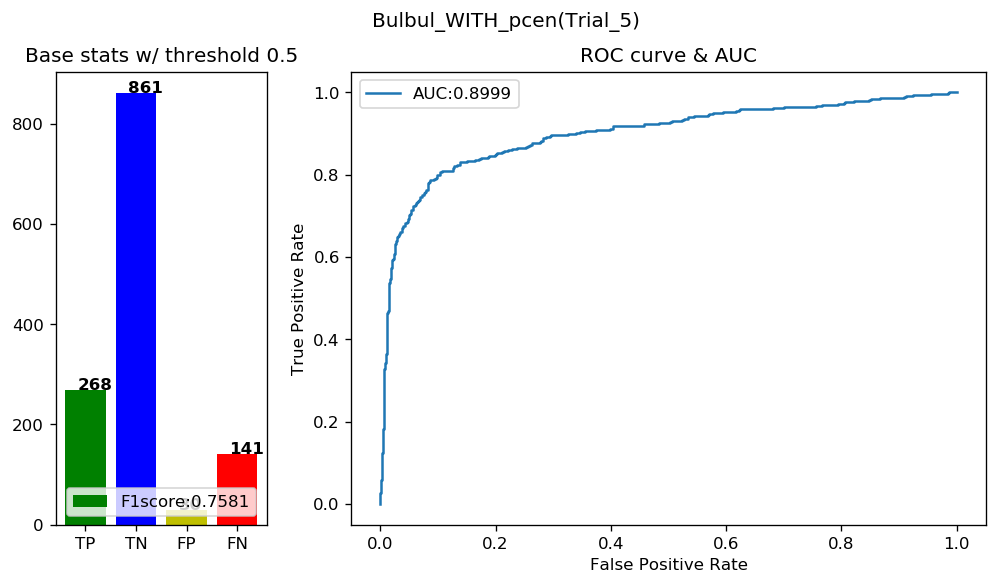

In [62]:
calc(
    ground_truth_path,
    path_y_hat="raw_preds/pcen/bulbul_pcen4.csv",
    th=0.5,
    gr=True,
    graph_name="Bulbul_WITH_pcen(Trial_5)",
    save=True,
)

---

## compute average roc curve

In [44]:
def mean_graph(path, title, s):
    fig, (ax1, ax2) = plt.subplots(
        1, 2, figsize=(8, 5), dpi=120, gridspec_kw={"width_ratios": [1, 3]}
    )
    th = 0.5
    colorful = ["g", "b", "y", "r"]
    x_axis = ["TP", "TN", "FP", "FN"]
    y_actual = pd.read_csv(ground_truth_path,encoding='utf8',engine='python').iloc[:, -1]
    y_actual_th = y_actual > th

    stats_concat = []
    f1scor = []

    aucs = []
    tprs = []
    mean_fpr = np.linspace(0, 1, 100)

    for n, i in enumerate(os.listdir(path)):
        f = os.path.join(path, i)
        y_hat = pd.read_csv(f,encoding='utf8').iloc[:, -1]
        y_hat_th = y_hat > th

        stats = base_stats(y_actual_th, y_hat_th)
        f1score = f1(stats)
        stats_concat.append(stats)
        f1scor.append(f1score)

        fpr, tpr, _ = metrics.roc_curve(y_actual, y_hat)
        auc = metrics.roc_auc_score(y_actual, y_hat)
        ax2.plot(
            fpr, tpr, label="Trial {} (AUC = {:.4f})".format(n + 1, auc), alpha=0.3
        )

        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(auc)

    stats_concat = np.array(stats_concat)
    mean_stats = np.average(stats_concat, axis=0)
    f1scor = np.array(f1scor)
    mean_f1 = np.average(f1scor, axis=0)
    ax1.bar(x_axis, mean_stats, color=colorful, label="Mean F1:{0:.3f}".format(mean_f1))
    for i, v in enumerate(mean_stats):
        ax1.text(i - 0.15, v + 0.5, int(mean_stats[i]), fontweight="bold")
    ax1.title.set_text("Mean Base Stats w/ {} threshold".format(th))
    ax1.legend(loc="lower center")

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax2.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        #              color='r',
        label="Mean ROC (AUC = {0:.2f} $\pm$ {1:.2f})".format(mean_auc, std_auc),
        lw=2,
    )

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax2.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.3,
        label=r"$\pm$ 1 std. dev.",
    )
    ax2.set(xlabel="False Positive Rate", ylabel="True Positive Rate")
    ax2.legend()

    ax2.title.set_text("Mean ROC Curve & AUC")
    now = str(datetime.now())
    fig.suptitle(title)
    if s == True:
        fig.savefig("/home/richardso21/images/{}{}.png".format(title, now))

    return aucs, mean_auc, mean_fpr, mean_tpr

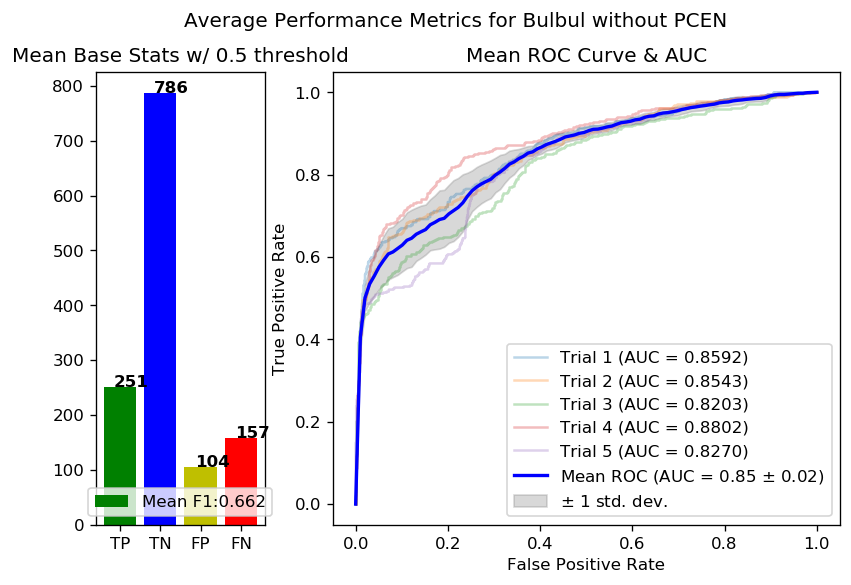

In [45]:
no_pcen = mean_graph(
    "raw_preds/no_pcen/", "Average Performance Metrics for Bulbul without PCEN", False
)

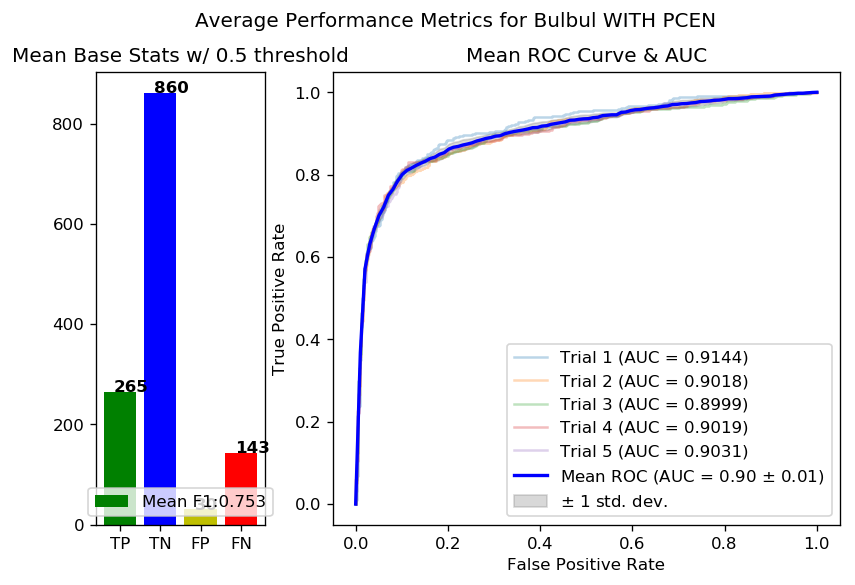

In [344]:
pcen = mean_graph(
    "raw_preds/pcen/", "Average Performance Metrics for Bulbul WITH PCEN", True
)

---

## Statistical Significance!

In [330]:
stats_df = pd.DataFrame(
    [no_pcen[0], pcen[0]],
    index=["no pcen", "pcen"],
    columns=["Trial {}".format(n + 1) for n in range(len(pcen[0]))],
)

In [338]:
x = stats.ttest_ind(stats_df.loc["no pcen"], stats_df.loc["pcen"])
print(x)

Ttest_indResult(statistic=-4.967415172514357, pvalue=0.0010966491906056713)


__p-value < 0.05! reject null hypothesis__

In [339]:
avg = lambda x: sum(x) / len(x)
stats_df = stats_df.assign(
    Average=[avg(stats_df.loc["no pcen"]), avg(stats_df.loc["pcen"])]
)

In [341]:
stats_df.loc["T-Test", "P-Value"] = x[1]

In [342]:
stats_df.replace(np.nan, "", regex=True, inplace=True)
stats_df

,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5,Average,P-Value
no pcen,0.859158,0.854338,0.820336,0.880204,0.826951,0.848197,
pcen,0.914403,0.901837,0.899928,0.901896,0.903068,0.904226,
T-Test,,,,,,,0.00109665


In [351]:
stats_df.to_csv("stats_df.csv")

---

## Direct comparison of Mean ROC Curves

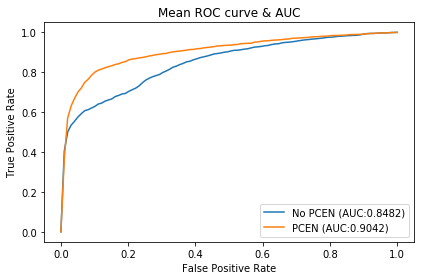

In [355]:
plt.plot(
    no_pcen[2],
    no_pcen[3],
    label="No PCEN (AUC:{:.4f})".format(stats_df.loc["no pcen", "Average"]),
)
plt.plot(
    pcen[2], pcen[3], label="PCEN (AUC:{:.4f})".format(stats_df.loc["pcen", "Average"])
)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Mean ROC curve & AUC")
plt.legend()
plt.tight_layout()
plt.savefig("/home/richardso21/images/means_pcen_vs_nopcen_bulbul.png", dpi=120)